## Теория графов. Деревья.

### Дерево.

Дерево - это ***связный ациклический*** граф.  
Дерево - это ***связный*** граф, состоящий из **$n$** вершин и $n - 1$ ребра.  
  
  Нетрудно доказать, что 
  эти два определения являются эквивалентными. Действительно, в любом связном графе обязательно будет хотя бы $n - 1$ ребро, поскольку в пустом графе есть ровно n компонент связности, а добавления одного нового ребра уменьшает кол-во компонент связности максимум на $1$. Если же к связному ациклическому графу добавить произвольное новое ребро $u \rightarrow v$, то в графе появится цикл от $u$ до $v$. Из этого следует, что в любом дереве кол-во ребер ровно $n - 1$.

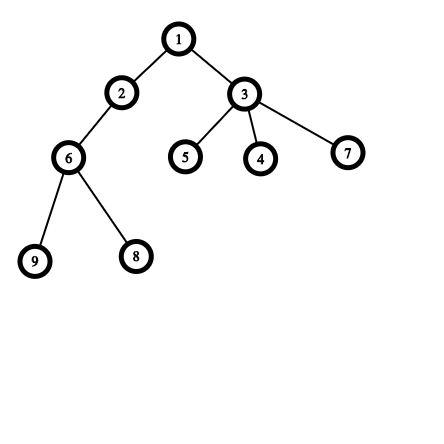

### Задание № 0.

Решите задачу "Дерево?" e-olimp $0977$.  
В этой задаче реализуйте **dfs** на матрице смежности графа.

In [1]:
def dfs(v):
    p[v] = True
    for i in range(n):
        if g[v][i] and not p[i]:
            dfs(i)


n = int(input())
g = []
c = 0
for i in range(n):
    a = list(map(int, input().split()))
    g.append(a)
    c += a.count(1)

p = [False] * n
dfs(0)
print('YES' if sum(p) == n and c // 2 == n - 1 else 'NO')

4
1 1 1 1
1 1 1 1
1 1 1 1
1 1 1 1
NO


### Корневое или подвешенное дерево.

При решении задач практически всегда возникает необходимость работать с ***корневыми*** деревьями.  

***Корневым*** или ***подвешенным*** деревом называется дерево с одной выделенной вершиной 𝑟𝑜𝑜𝑡  - корнем дерева  (практически всегда  𝑟𝑜𝑜𝑡=$1$ ). Для корневого дерева можно ввести следующие понятия:

* $h[v]$ - ***высота*** вершины $v$ ($height[v]$), равняется расстоянию от вершины $root$ до вершины $v$. Например, $h[root]$ всегда равно $0$, а в дереве на рисунке выше при $root = 1$, $h[8] = 3$, $h[5] = 2$;


* $p[v]$ - ***предок*** вершины $v$ ($parent[v]$), а именно единственная вершина на высоте $h[v] - 1$, соединенная ребром с вершиной $v$. Для удобства считается, что $p[root] = root$. Например, в дереве на рисунке выше $p[1] = 1$, $p[8] = 6$, $p[5] = 3$;


* $subtree$ of $v$ - ***поддерево*** вершины $v$, а именно множество всех вершин, в которые можно добраться из $v$, не проходя через вершину $p[v]$. В частности, поддерево вершины $root$ всегда является полным множеством всех вершин дерева.  
В дереве на рисунке выше $subtree(1)$ = {$1, 2, 3, 4, 5, 6, 7, 8, 9$}, $subtree(6)$ = {$6, 8, 9$}, $subtree(5)$ = {$5$};


* $sz[v]$ - ***размер поддерева*** вершины $v$ ($size[v]$), а именно кол-во вершин в поддереве вершины $v$.

Зададим граф списком смежности и инициализируем вспомогательные структуры:

In [2]:
g = [[1, 2], [0, 5], [0, 3, 4, 6], [2], [2], [1, 7, 8], [2], [5], [5]]
n = len(g)
h = [-1] * n
p = [-1] * n
sz = [0] * n
root = 0
p[root] = root
h[root] = root

### Задание №1.

Для каждой вершины $v$ дерева на рисунке $1$ выписать $h[v]$, $p[v]$, $subtree(v)$, $sz[v]$.

Массив высот:                h = [0, 1, 1, 2, 2, 2, 2, 3, 3]  
Массив предков                p = [0, 0, 0, 2, 2, 1, 2, 5, 5]   
Список поддеревьев  
Массив размера поддеревьев      sz = [9, 4, 4, 1, 1, 3, 1, 1, 1]


### Обход дерева.

* Для того, чтобы обойти все вершины дерева, достаточно реализовать рекурсивную функцию ***dfs***$(v)$, которая будет обходить все вершины поддерева $v$. Для этого достаточно перебрать все смежные вершины $to$ с $v$ и в случае если $to \neq p[v]$, нужно выставить предка вершины $to$ $(p[to] = v)$ и запустить ***dfs***$(to)$.

* Такая реализация ***dfs*** на дереве автоматически подсчитывает массив предков $p$.

* Для того чтобы посчитать массив высот $h$, необходимо перед вызовом ***dfs***($to$) просто присвоить $h[to] = h[v] + 1$. 

* Для подсчета массива $sz$ можно воспользоваться рекуррентной формулой: $sz[v] = 1 + \sum_{to \neq p[v]} sz[to]$.

### Задание №2.

Написать программу, которая выполняет ***dfs*** обход дерева, автоматически подсчитывая массивы $h$, $p$, $sz$. Программа должна считывать $n$ и $root$ в первой строке, а затем $(n - 1)$ строку - ребра дерева, а выводить $3$ массива - $h$, $p$, $sz$. 


Запустить программу на тесте, соответствующем рисунку $1$, и убедиться, что массивы $h$, $p$, $sz$ совпадают с массивами, найденными в задании №$1$.


In [3]:
def dfs(v):
    sz[v] = 1
    for to in g[v]:
        if to != p[v]:
            p[to] = v
            h[to] = h[v] + 1
            dfs(to)
            sz[v] += sz[to]
            
            
dfs(root)

print(f'Массив высот: h = {h}')
print(f'Массив предков p = {p}')
print(f'Массив размера поддеревьев sz = {sz}')


Массив высот: h = [0, 1, 1, 2, 2, 2, 2, 3, 3]
Массив предков p = [0, 0, 0, 2, 2, 1, 2, 5, 5]
Массив размера поддеревьев sz = [9, 4, 4, 1, 1, 3, 1, 1, 1]


### Задание №3.

Не запуская программу, написанную в задании №$2$, выпишите порядок вершин, в котором функция dfs посетит все вершины дерева.  

**Ответ:** $1\rightarrow2\rightarrow6\rightarrow8\rightarrow9\rightarrow3\rightarrow4\rightarrow5\rightarrow7$			

### Задание №4.

Модифицируйте программу, написанную в задании №$2$ так, чтобы она находила и выводила массив $order$ - список всех вершин в порядке посещения. Убедитесь, что полученный массив $order$ совпадает с порядком вершин, выписанным в задании №$3$.


In [4]:
def dfs(v):
    order.append(v + 1)
    for to in g[v]:
        if to != p[v]:
            p[to] = v
            dfs(to)
            
order = []
dfs(root)
print(order)

[1, 2, 6, 8, 9, 3, 4, 5, 7]


### Определение:

+ Назовем **tin[v]** ($time$_$in[v]$) - время входа в вершину $v$ в процессе обхода дерева. А именно, **tin[v]** - это позиция вершины $v$ массиве $order$.   

+ Аналогично скажем, что **tout[v]** - это время выхода из вершины $v$ в процессе обхода дерева. А именно, **tout[v]** - это самая правая позиция какой-то вершины $x \in subtree(v)$в массиве $order$.


Для того, чтобы посчитать значения **tin[v]**, достаточно в самом начале функции **dfs** присвоить $tin[v] = len(order)$. Аналогично, для подсчета значений **tout[v]**, достаточно в конце функции **dfs** присвоить $tout[v] = len(order) - 1$.


### Задание №5.

Выпишите, чему равны массивы **tin** и **tout** для дерева, соответствующего рисунку $1$.

#### Решение:

**tin** =   $[0, 1, 5, 6, 7, 2, 8, 3, 4]$	

**tout** = $[8, 4, 8, 6, 7, 4, 8, 3, 4]	$

### Задание №6.

Модифицируйте программу, написанную в задании №$4$ так, чтобы она находила выводила массивы **tin** и **tout**. Убедитесь, что полученные массивы совпадают с соответствующими массивами, выписанным в задании №$5$.


In [6]:
def dfs(v):
    tin[v] = len(order)
    order.append(v + 1)
    for to in g[v]:
        if to != p[v]:
            p[to] = v
            dfs(to)
    tout[v] = len(order) - 1
    

order = []

In [7]:
tin = [0] * n
tout = [0] * n
dfs(root)
print(order)
print(tin)
print(tout)


[1, 2, 6, 8, 9, 3, 4, 5, 7]
[0, 1, 5, 6, 7, 2, 8, 3, 4]
[8, 4, 8, 6, 7, 4, 8, 3, 4]


Если посмотреть внимательно на массивы **tin** и **tout**, то можно заметить, что подотрезок массива $order$ от **tin[v]** до **tout[v]** будет представлять собой все вершины из поддерева $v$.


### Задание №7.

Используя массивы **tin** и **tout** вывести список вершин $subtree(v)$ для каждой вершины $v$.

#### Решение:

$subtree(v) =  [[1, 2, 6, 8, 9, 3, 4, 5, 7], [2, 6, 8, 9], [3, 4, 5, 7], [4], [5], [6, 8, 9], [7], [8], [9]]$						

In [8]:
for v in range(n):
    print(f'subtree({v + 1}) = {order[tin[v]:tout[v] + 1]}')

subtree(1) = [1, 2, 6, 8, 9, 3, 4, 5, 7]
subtree(2) = [2, 6, 8, 9]
subtree(3) = [3, 4, 5, 7]
subtree(4) = [4]
subtree(5) = [5]
subtree(6) = [6, 8, 9]
subtree(7) = [7]
subtree(8) = [8]
subtree(9) = [9]


### Проверка того, что одна вершина является предком другой.

Если вершина $a$ является предком вершины $b$, то поддерево вершины $a$ содержит все вершины из поддерева $b$: $subtree(b) \subset subtree(a)$.

Поскольку поддерево любой вершины $v$ однозначно задается отрезком $[tin[v]; tout[v]]$, то получаем простой критерий того, что вершина $a$ является предком $b$: 

+ $tin[a] \leq tin[b] \leq tout[b] \leq tout[a]$

### Задание №8.

Реализовать функцию $is$_$ancestor(a, b)$, которая возвращает $True$, если вершина $a$ является предком $b$, и $False$ в противном случае. Вывести значение данной функции для всех пар вершин $u$, $v$.

In [9]:
def is_ancestor(a, b):
    return tin[a] <= tin[b] <= tout[b] <= tout[a]

In [10]:
for i in range(n):
    for j in range(n):
        print(1 if is_ancestor(i, j) else 0, end=' ')
    print()

1 1 1 1 1 1 1 1 1 
0 1 0 0 0 1 0 1 1 
0 0 1 1 1 0 1 0 0 
0 0 0 1 0 0 0 0 0 
0 0 0 0 1 0 0 0 0 
0 0 0 0 0 1 0 1 1 
0 0 0 0 0 0 1 0 0 
0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 1 


### Задание №9. 

Сдать задачу “Предок” (e-olimp № $1941$).


In [11]:
#TODO

#### Определение:

+ **Наименьшим общим предком** ($least$ $common$ $ancestor$) двух вершин $a$ и $b$ называется такая вершина $c$, которая одновременно является и предком $a$, и предком $b$, а ее высота $h[c]$ - максимально возможная.
    

### Задание №10.

Постройте вручную табличку, в которую запишите значение наименьшего общего предка для каждой пары вершин $a$, $b$.

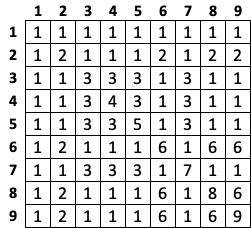

### Нахождение наименьшего общего предка.

Будем последовательно подниматься по предкам от вершины $a$ к корню до тех пор, пока не будет выполняться условие $is$_$ancestor(a, b)$ (сделать одну операцию подъема можно с помощью присвоения $a = p[a]$). Как только условие $is$_$ancestor(a, b)$ выполнится, в $a$ будет содержаться искомое значение наименьшего общего предка. Поскольку функция $is$_$ancestor$ работает за O(1), а максимальное кол-во подъемов будет $O(n)$, такой алгоритм будет работать за $O(n)$.


### Задание №11.

Реализовать функцию $lca(a, b)$ ($least$ $common$ $ancestor$), которая возвращает наименьшего общего предка двух вершин $a$ и $b$. Запустить ее на всех парах вершин $a$, $b$ и вывести результат. Убедиться, что результат совпадает с таблицей, выписанной в задании №$10$.


In [12]:
def lca(a, b):
    while not is_ancestor(a, b):
        a = p[a]
    return a

In [13]:
for i in range(9):
    for j in range(9):
        print(lca(i, j) + 1, end=' ')
    print()
        

1 1 1 1 1 1 1 1 1 
1 2 1 1 1 2 1 2 2 
1 1 3 3 3 1 3 1 1 
1 1 3 4 3 1 3 1 1 
1 1 3 3 5 1 3 1 1 
1 2 1 1 1 6 1 6 6 
1 1 3 3 3 1 7 1 1 
1 2 1 1 1 6 1 8 6 
1 2 1 1 1 6 1 6 9 


### Задание №12.

Сдать задачу acmp 0414 “Расследование”.

In [1]:
#TODO

Сдать задачу codeforces “LCA начало”.  
https://codeforces.com/gym/100091

In [14]:
def dfs(v):
    tin[v] = len(order)
    order.append(v)
    for to in g[v]:
        if to != p[v]:
            p[to] = v
            dfs(to)
    tout[v] = len(order) - 1


def is_ancestor(a, b):
    return tin[a] <= tin[b] <= tout[b] <= tout[a]


def lca(a, b):
    while not is_ancestor(a, b):
        a = p[a]
    return a + 1


g = [[] for i in range(1000)]
get = []
k = int(input())
for i in range(k):
    a, b, c = input().split()
    if a == 'ADD':
        g[int(b) - 1].append(int(c) - 1)
        g[int(c) - 1].append(int(b) - 1)
    else:
        get.append([int(b) - 1, int(c) - 1])


p = [0] * 1000
root = 0
p[root] = root
order = []
tin = [0] * 1000
tout = [0] * 1000
dfs(root)
for i in get:
    print(lca(i[0], i[1]))


9
ADD 1 2 
ADD 1 3
ADD 2 4
GET 1 3
GET 2 3
GET 3 4
ADD 2 5
GET 4 5
GET 5 5
1
1
1
2
5
